### Setup

In [1]:
import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

l = lib.Offload()

### Welche weiteren Erkenntnisse lassen sich aus den erfassten Messdaten ableiten?

#### Soll man auch wegen der Luftfeuchtigkeit lüften?

In [2]:
data = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")
meteo = l.get_meteo(startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 09:30:00")

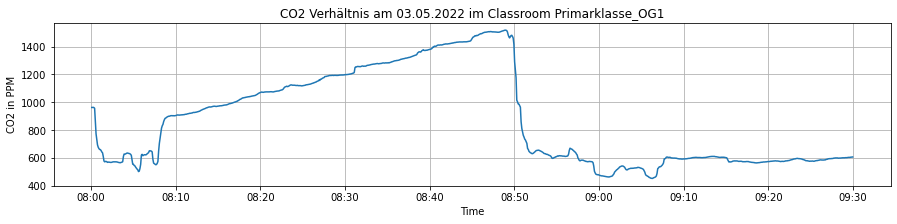

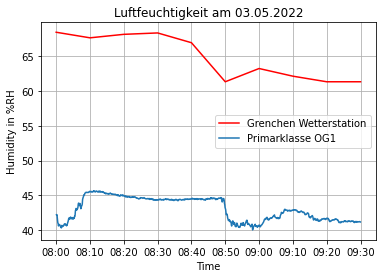

In [3]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 03.05.2022 im Classroom Primarklasse_OG1")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

#plt.figure(figsize = (15,3))
plt.plot(meteo.index, meteo.iloc[:, 3], label = "Grenchen Wetterstation", color = "red")
plt.plot(data["time"], data["humidity"], label = "Primarklasse OG1")
plt.legend(loc = "center right")
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 03.05.2022")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

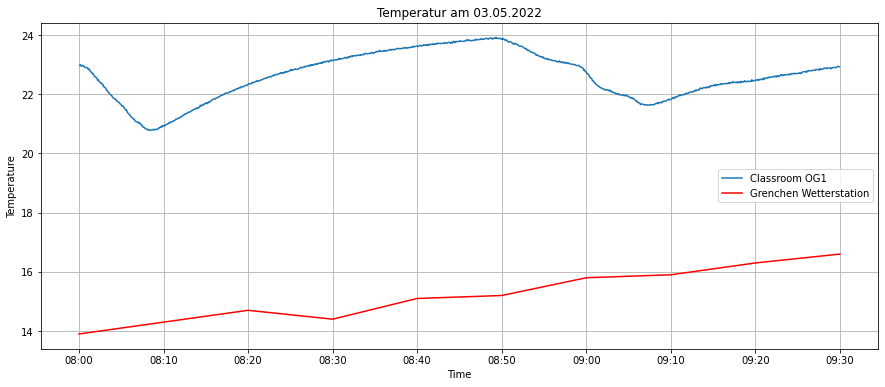

In [4]:
plt.figure(figsize = (15,6))
plt.plot(data["time"], data["temperature"], label = "Classroom OG1")
plt.plot(meteo.index, meteo.iloc[:, 1], label = "Grenchen Wetterstation", color = "red")
plt.legend(loc = "center right")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperatur am 03.05.2022")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()


In [5]:
data = l.get_measurement(name = "Oberstufe", startDate = "2022-04-26 08:00:00", endDate = "2022-04-26 09:30:00")
meteo = l.get_meteo(startDate = "2022-04-26 08:00:00", endDate = "2022-04-26 09:30:00")

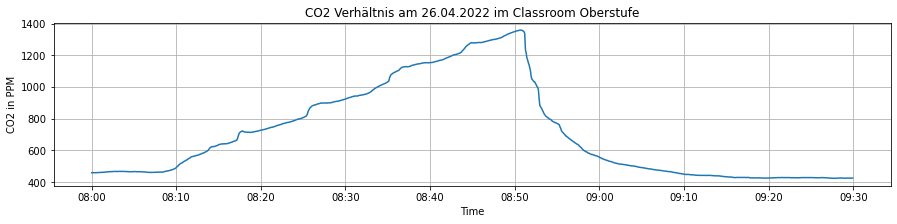

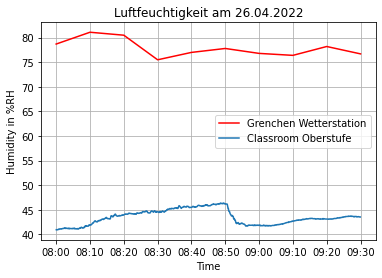

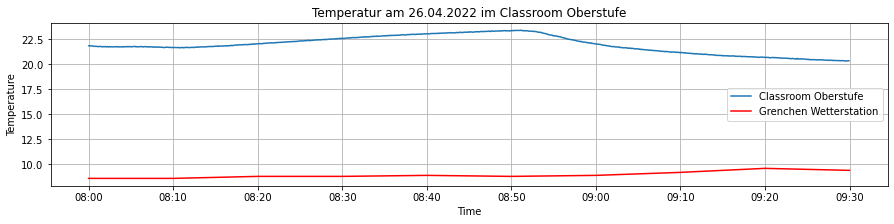

In [6]:
plt.figure(figsize = (15,3))
plt.plot(data["time"], data["co2"])
plt.xlabel("Time")
plt.ylabel("CO2 in PPM")
plt.title("CO2 Verhältnis am 26.04.2022 im Classroom Oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

#plt.figure(figsize = (15,3))
plt.plot(meteo.index, meteo.iloc[:, 3], label = "Grenchen Wetterstation", color = "red")
plt.plot(data["time"], data["humidity"], label = "Classroom Oberstufe")
plt.legend(loc="center right")
plt.xlabel("Time")
plt.ylabel("Humidity in %RH")
plt.title("Luftfeuchtigkeit am 26.04.2022")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

plt.figure(figsize = (15,3))
plt.plot(data["time"], data["temperature"], label = "Classroom Oberstufe")
plt.plot(meteo.index, meteo.iloc[:, 1], label = "Grenchen Wetterstation", color = "red")
plt.legend(loc = "center right")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperatur am 26.04.2022 im Classroom Oberstufe")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.grid()
plt.show()

#### Ist die Luftqualität und Temperatur der Klassenzimmer überhaupt gut?

https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470118849.ch15 "ACHTUNG: Zittierung von einem Buch, welches nicht online verfügbar ist."

Research has shown that within the range of 18–24 degrees C (64–75°F) , fluctuations in relative humidity (RH) between 30% and 70% have little influence on ET.
When buildings are heated, the relative humidity typically decreases. A RH below
30% can cause irritation of the nasal and bronchial passages. A RH above 70% can
produce a feeling of “stuffiness.” 

https://doi.org/10.1016/j.buildenv.2022.108756 

It was shown that ambient relative humidity is a major factor influencing lifetime of droplets and the distance they may travel. As a consequence, and independently of any other health consideration linked to ambient humidity, it is seen that a dry air is a favourable factor for limiting risk of contamination from COVID19.

Nach der ersten Quelle schliessen wir, dass die relative Luftfeuchtigkeit lieber nicht unter 30% oder über 70% gehen soll. 
Bei der zweiten Quelle sehen wir, dass die Luftfeuchtigkeit desto trockener wie möglich sein soll. Nach Figure 5. können wir sagen, dass der Wert am besten unter 50% liegen soll aber dass es nicht schlimm ist, wenn er bis zu 70% geht.

Ideal wäre in diesem Falle um die 40% - 50%.

In [7]:
data_eg = l.get_measurement(name = "Primarklasse_EG", startDate = "2022-04-21 00:00:00", endDate = "2022-05-12 00:00:00")

data_og = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-04-21 00:00:00", endDate = "2022-05-12 00:00:00")

data_os = l.get_measurement(name = "Oberstufe", startDate = "2022-04-21 00:00:00", endDate = "2022-05-12 00:00:00")

data = pd.concat([data_eg, data_og, data_os]).reset_index()

meteo = l.get_meteo(startDate = "2022-04-21 00:00:00", endDate = "2022-05-12 00:00:00")


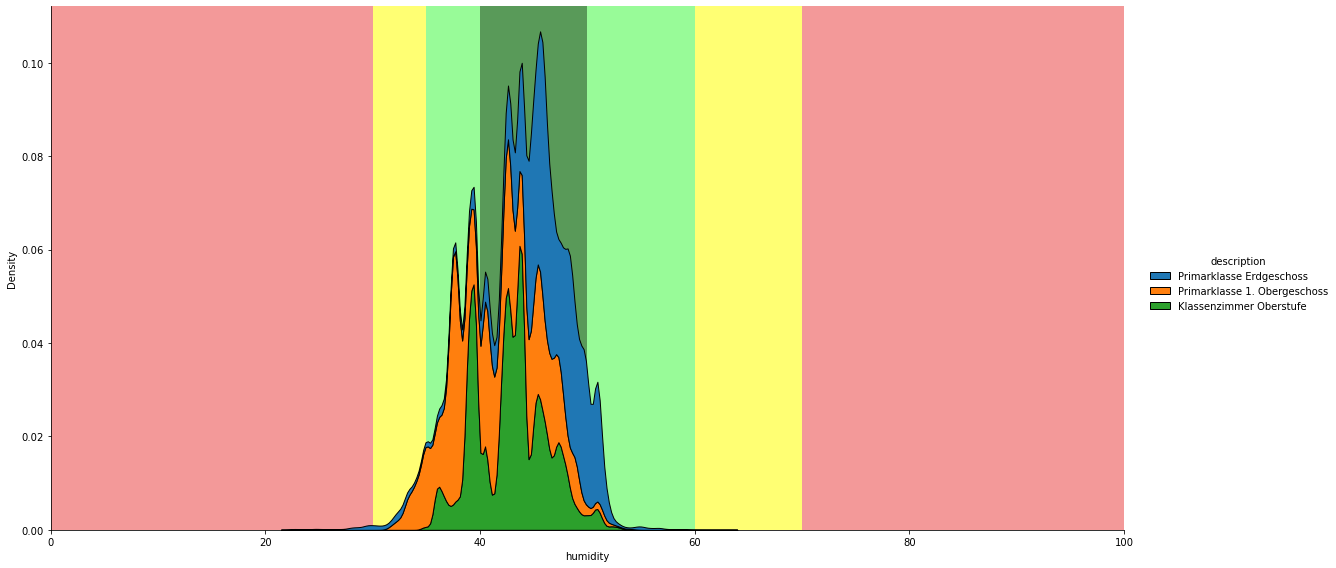

In [8]:
sns.displot(data, x = "humidity", kind = "kde", hue = "description", height = 8, aspect = 2, multiple = "stack", zorder = 2, alpha = 1)
plt.xlim(0, 100)

plt.axvspan(0, 30, facecolor = "lightcoral", alpha = 0.8, zorder = 1)
plt.axvspan(30, 35, facecolor = "yellow", alpha = 0.55, zorder = 1)
plt.axvspan(35, 40, facecolor = "palegreen", zorder = 1)
plt.axvspan(40, 50, facecolor = "darkgreen", alpha = 0.65, zorder = 1)
plt.axvspan(50, 60, facecolor = "palegreen", zorder = 1)
plt.axvspan(60, 70, facecolor = "yellow", alpha = 0.55, zorder = 1)
plt.axvspan(70, 100, facecolor = "lightcoral", alpha = 0.8, zorder = 1)

plt.show()

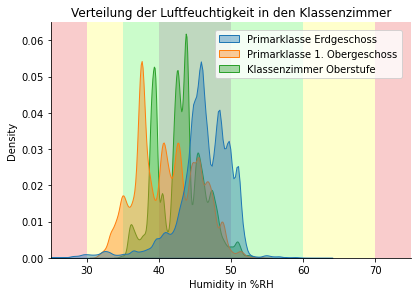

In [9]:
ax = sns.displot(data, x = "humidity", kind = "kde", hue = "description", 
height = 4, aspect = 1.5, zorder = 2, fill = True, alpha = 0.4)
sns.move_legend(obj = ax, loc = "center", bbox_to_anchor = (0.505, 0.853), frameon = True, title = None)
plt.xlim(25, 75)
plt.xlabel("Humidity in %RH")
plt.title("Verteilung der Luftfeuchtigkeit in den Klassenzimmer")

plt.axvspan(0, 30, facecolor = "lightcoral", alpha = 0.4, zorder = 1)
plt.axvspan(30, 35, facecolor = "yellow", alpha = 0.2, zorder = 1)
plt.axvspan(35, 40, facecolor = "palegreen", alpha = 0.5,zorder = 1)
plt.axvspan(40, 50, facecolor = "darkgreen", alpha = 0.25, zorder = 1)
plt.axvspan(50, 60, facecolor = "palegreen", alpha = 0.5,zorder = 1)
plt.axvspan(60, 70, facecolor = "yellow", alpha = 0.2, zorder = 1)
plt.axvspan(70, 100, facecolor = "lightcoral", alpha = 0.4, zorder = 1)

plt.show()

https://doi.org/10.1186/s40201-014-0113-7

The effect of indoor room temperature has more influences than the effect of illumination. The effect of indoor temperature has 38.56% of contribution on the performance. The optimum levels of indoor temperature at 21°C and illumination at 1000 lux have improved the work performance and health of office workers.

The productivity is one of the most important factor which can affect overall performance of any organization either small or entire nation. The Performance of call center workers has less Performance, when the temperature was above 25°C. Performance has been re- duced to 2.4% per degree temperature increase between 21.9°C to 28.5°C.

---
Bei Kälte kein Minimum gefunden aber man kann argumentieren dass man sich im Winter kälter anziehen kann

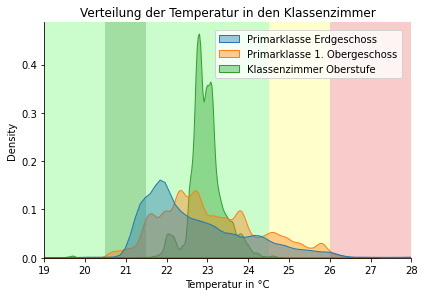

In [10]:
ax = sns.displot(data, x = "temperature", kind = "kde", hue = "description", 
height = 4, aspect = 1.5, zorder = 2, fill = True, alpha = 0.4)
sns.move_legend(obj = ax, loc = "center", bbox_to_anchor = (0.505, 0.853), frameon = True, title = None)
plt.xlim(19, 28)
plt.xlabel("Temperatur in °C")
plt.title("Verteilung der Temperatur in den Klassenzimmer")

plt.axvspan(19, 24.5, facecolor = "palegreen", alpha = 0.5,zorder = 1)
plt.axvspan(20.5, 21.5, facecolor = "darkgreen", alpha = 0.2, zorder = 1)
plt.axvspan(24.5, 26, facecolor = "yellow", alpha = 0.2, zorder = 1)
plt.axvspan(26, 28, facecolor = "lightcoral", alpha = 0.4, zorder = 1)

plt.show()